


<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


## Advanced Clustering: Affinity Propagation

#### Odai Alaa Elyas
#### Department of Petroleum Engineering, UT Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)

### Executive Summary

One of the crucial steps to implementing machine learning algorithms on a data set includes data clustering. Data clustering provides a mean to visualize the different groups involved in a data set. In this course, we looked over different clustering methodologies, and I concluded that K-means clustering and DBSCAN both have a number of limitation. First, K-means requires adding the number of clusters as an input to the model, this is particularly challenging when the cluster groups are intertwined. DBSCAN, however, is highly dependent on the number of point in a neighborhood and the radius size, making troublesome to clearly identify the number in a data set. This project looks at affinity propogation and illustrates it's advantages by comparing it to K-means and DBSCAN clustering methods. 

This workflow will compare the two clustering methods described above with affinity propagation and illustrates the advantages, and limitations of wach method. First  a random data set generated by the make_blobs package on python. Next, we will compare the different clustering methods using a data set for reservoire properties to determine the clustering of lineaed spatial phenomena such as rock facies. 

### Import Packages

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import copy                               # for deep copies
from sklearn.neighbors import NearestNeighbors # nearest neighbours function to calculate eps hyperparameter
from sklearn.preprocessing import MinMaxScaler # min/max normalization
from sklearn.cluster import KMeans        # k-means clustering
from sklearn.cluster import DBSCAN        # DBSCAN clustering
from sklearn.cluster import AffinityPropagation #Affinity Propagation
#from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs #Generate random data set
from itertools import cycle
cmap = plt.cm.inferno

import warnings
warnings.filterwarnings('ignore')

### Generate Random Data Set
This notebook will use two data sets, the first data set represented in this section will be generated using the make_blobs function in scikit learn as follows.

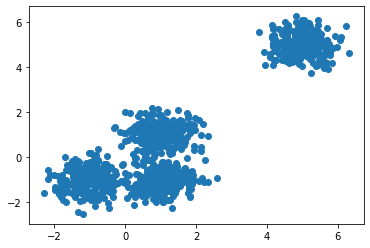

In [2]:
centers = [[1, 1], [-1, -1], [1, -1], [5,5]]
X, labels_true = make_blobs(n_samples = 1000, centers = centers,
                           cluster_std = 0.5, random_state = 0)
df = pd.DataFrame(X, columns = ['Feature1', 'Feature2'])
plt.scatter(X[:,0], X[:,1])

Plotting the data set will give a general idea of the number of clusters to expect

### Transforming Data using Min/Max Normalization:
Although this data set does not have large variance between the two features, it is generally best practice to transfrom the data to ensure consistency. Min/Max normalization transforms the data to a mean = 0 and std = 1.

The following code is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_clustering.ipynb from [GeostatsGuy GitHub]
(https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

In [3]:
transform = MinMaxScaler();
features = ['Feature1', 'Feature2']
df['n'+ 'Feature1'] = transform.fit_transform(df.loc[:,features].values)[:,0]
df['n'+ 'Feature2'] = transform.fit_transform(df.loc[:,features].values)[:,1]

### K-Means Clustering
The first step is to illustrate K-means clustering. Which is a clustering method that takes as an input the required number of clusters, and uses it to locate the optimal location for a centeroid of the cluster.It can be seen from the plot generated above that the random data set can be divided into 4 different clusters. As such, we will set K=4 to generate 4 clusters. 

The following code is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_clustering.ipynb from [GeostatsGuy GitHub]
(https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

In [16]:
np.random.seed(210)
K=4
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'k', 7: 'w'}

dfk = df[['nFeature1', 'nFeature2']]
kmeans = KMeans(n_clusters = K, random_state = 0, n_init = 100).fit(dfk)
dfk['kmeans'] = kmeans.labels_ +1
dfk

,nFeature1,nFeature2,kmeans
0,0.321695,0.319914,4
1,0.485187,0.423413,4
2,0.818851,0.924734,2
3,0.273178,0.081612,3
4,0.805187,0.762206,2
...,...,...,...
995,0.154469,0.111964,1
996,0.286539,0.100474,3
997,0.417936,0.113609,3
998,0.477487,0.194691,3


### DBSCAN 
Next, we illustrate the use of DBSCAN for clustering. Which is a density based spacial clustering technique that takes as an input the radius size, and the number of samples in the radius. The algorithm iterates throughout each sample and determines whether the point is in the cluster neighborhood or an outlier.Unlike K-means, DBSCAN divides the data set into clusters based on Euclidean distance that is dependent on the radius, and number of samples chosen. 

The following code is from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_clustering.ipynb from [GeostatsGuy GitHub]
(https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

In [17]:
dfdb = df[['nFeature1', 'nFeature2']]
dbscan = DBSCAN(eps= 0.04, min_samples=30).fit(dfdb)
dfdb['DBSCAN'] = dbscan.labels_ + 1
dfdb

,nFeature1,nFeature2,DBSCAN
0,0.321695,0.319914,2
1,0.485187,0.423413,2
2,0.818851,0.924734,3
3,0.273178,0.081612,0
4,0.805187,0.762206,3
...,...,...,...
995,0.154469,0.111964,4
996,0.286539,0.100474,0
997,0.417936,0.113609,1
998,0.477487,0.194691,1


### Affinity Propagation
The final step is to compare Affinity Propagation to the previous to clustering methods. Which is a clustering technique that does not require setting the number of clusters, and is not dependend on radius or number of samples in a neighborhood. It is an unsupervised machine learning algorithm that works by estimating a measure of similarity between each data point. The algorithm then compares the similarity of all data points to divide the data set into different clusters.

In [18]:
X_AP = AffinityPropagation(damping = 0.9 ,max_iter = 1000, preference = -50).fit(X)
clusters_centers_ = X_AP.cluster_centers_indices_
n_clusters_ = len(clusters_centers_)
labels = X_AP.labels_

P = X_AP.predict(X)
df['AP Cluster'] = P
df

,Feature1,Feature2,nFeature1,nFeature2,AP Cluster
0,0.475724,0.289991,0.321695,0.319914,0
1,1.882026,1.200079,0.485187,0.423413,0
2,4.752102,5.608289,0.818851,0.924734,3
3,0.058396,-1.805439,0.273178,0.081612,1
4,4.634563,4.179148,0.805187,0.762206,3
...,...,...,...,...,...
995,-0.962707,-1.538550,0.154469,0.111964,2
996,0.173324,-1.639581,0.286539,0.100474,1
997,1.303556,-1.524085,0.417936,0.113609,1
998,1.815799,-0.811120,0.477487,0.194691,1


## Plotting

Text(0.5, 1.0, 'Estimated number of clusters using Affinity Propagation = 4')

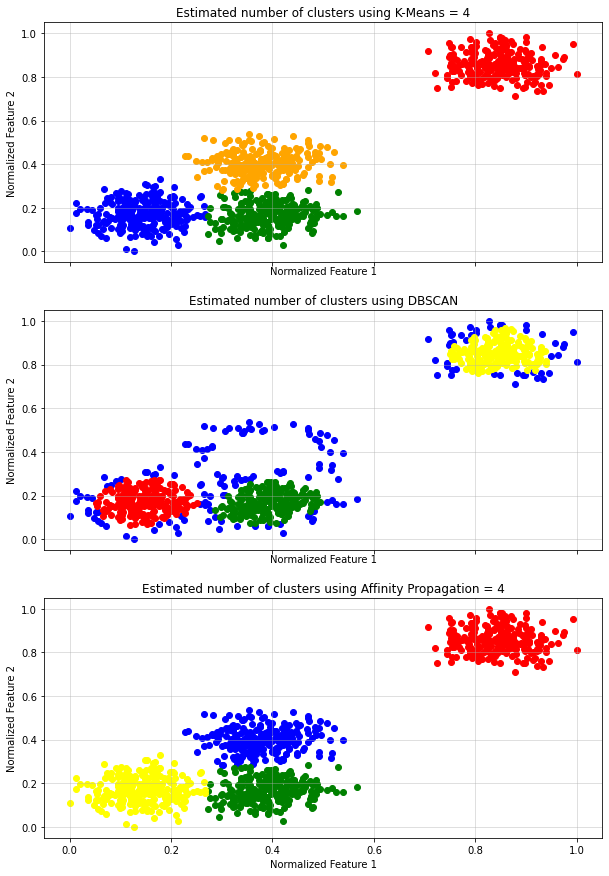

In [19]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(3, sharex = 'col', sharey = 'row', figsize = (10,15))

c1 = dfk[dfk['kmeans'] == 1]
c2 = dfk[dfk['kmeans'] == 2]
c3 = dfk[dfk['kmeans'] == 3]
c4 = dfk[dfk['kmeans'] == 4]
c5 = dfk[dfk['kmeans'] == 5]

d1 = dfdb[dfdb['DBSCAN'] == 0]
d2 = dfdb[dfdb['DBSCAN'] == 1]
d3 = dfdb[dfdb['DBSCAN'] == 2]
d3 = dfdb[dfdb['DBSCAN'] == 3]
d4 = dfdb[dfdb['DBSCAN'] == 4]
d5 = dfdb[dfdb['DBSCAN'] == 5]

f1 = df[df['AP Cluster'] == 0]
f2 = df[df['AP Cluster'] == 1]
f3 = df[df['AP Cluster'] == 2]
f4 = df[df['AP Cluster'] == 3]

##Generating plot for K-Means Clustering
ax1[0].scatter(c1['nFeature1'], c1['nFeature2'], color = 'blue')
ax1[0].scatter(c2['nFeature1'], c2['nFeature2'], color = 'red')
ax1[0].scatter(c3['nFeature1'], c3['nFeature2'], color = 'green')
ax1[0].scatter(c4['nFeature1'], c4['nFeature2'], color = 'orange')
ax1[0].grid(which = 'minor', alpha=0.1)
ax1[0].grid(which = 'major', alpha = 0.5)
ax1[0].set_xlabel('Normalized Feature 1')
ax1[0].set_ylabel('Normalized Feature 2')
ax1[0].set_title(f'Estimated number of clusters using K-Means = {K}')

#Generating plot for DBSCAN Clustering
ax1[1].scatter(d1['nFeature1'], d1['nFeature2'], color = 'blue')
ax1[1].scatter(d2['nFeature1'], d2['nFeature2'], color = 'green')
ax1[1].scatter(d3['nFeature1'], d3['nFeature2'], color = 'yellow')
ax1[1].scatter(d4['nFeature1'], d4['nFeature2'], color = 'red')
ax1[1].scatter(d5['nFeature1'], d5['nFeature2'], color = 'black')
ax1[1].grid(which = 'minor', alpha=0.1)
ax1[1].grid(which = 'major', alpha = 0.5)
ax1[1].set_xlabel('Normalized Feature 1')
ax1[1].set_ylabel('Normalized Feature 2')
ax1[1].set_title('Estimated number of clusters using DBSCAN')

#Generate plot for Affinity Propagation
ax1[2].scatter(f1['nFeature1'], f1['nFeature2'], color = 'blue')
ax1[2].scatter(f2['nFeature1'], f2['nFeature2'], color = 'green')
ax1[2].scatter(f3['nFeature1'], f3['nFeature2'], color = 'yellow')
ax1[2].scatter(f4['nFeature1'], f4['nFeature2'], color = 'red')
ax1[2].grid(which = 'minor', alpha=0.1)
ax1[2].grid(which = 'major', alpha = 0.5)
ax1[2].set_xlabel('Normalized Feature 1')
ax1[2].set_ylabel('Normalized Feature 2')
ax1[2].set_title(f'Estimated number of clusters using Affinity Propagation = {n_clusters_}')


### Importing Data set #2:
The second data set used for in this notebook is obtained from the data sets provided in class. The following data set was used (nonlinear_facies_v2.csv) which can also be found on Dr. Pyrcz's Github:https://github.com/GeostatsGuy

In [20]:
data2 = pd.read_csv("nonlinear_facies_v2.csv")
df2 = data2.loc[:, ~data2.columns.str.contains('^Unnamed')]
df2.describe()

,Por,AI,Facies
count,1800.000000,1800.000000,1800.000000
mean,17.122778,625.522917,1.666667
std,4.778704,247.547997,0.816723
min,0.000000,10.000000,1.000000
25%,14.663434,518.076017,1.000000
50%,17.674606,683.865824,1.000000
75%,20.361860,783.315226,2.000000
max,30.000000,1200.000000,3.000000


As we can see from the summary statistics above, porosity and AI values are incompatible. Hence, transforming the features is crucial prior to continuing with data clustering.

In [21]:
transform2 = MinMaxScaler(); 
features2 = ['Por','AI']

df2['n' + 'Por'] = transform2.fit_transform(df2.loc[:,features2].values)[:,0] # standardize the data features to mean = 0, var = 1.0
df2['n' + 'AI'] = transform2.fit_transform(df2.loc[:,features2].values)[:,1] # standardize the data features to mean = 0, var = 1.0
df2.head()

,Por,AI,Facies,nPor,nAI
0,8.980678,381.296221,3,0.299356,0.312014
1,10.135657,304.449932,3,0.337855,0.247437
2,16.150132,193.607906,3,0.538338,0.154292
3,13.696509,205.778123,3,0.456550,0.164519
4,13.132821,290.854794,3,0.437761,0.236012


### Data Visualization

Next, we visualize the data by dividing the set into different clusters given that Facies are provided in this set. This will be used to compare the results of the different clustering methods to the original data set.

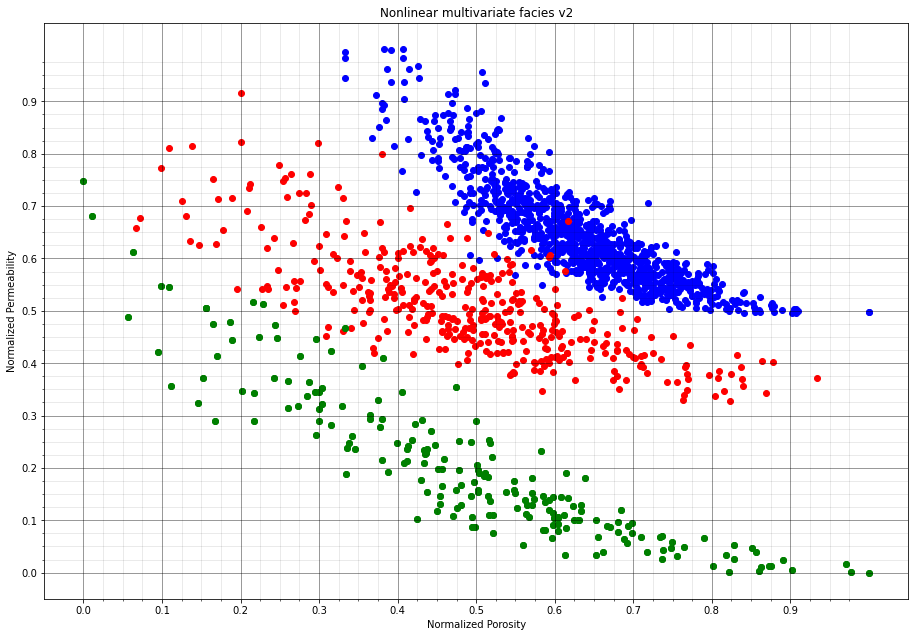

In [22]:
f4 = df2[df2['Facies'] == 1]
f5 = df2[df2['Facies'] == 2]
f6 = df2[df2['Facies'] == 3]

plt.scatter(f4['nPor'], f4['nAI'], color = 'blue')
plt.scatter(f5['nPor'], f5['nAI'], color = 'red')
plt.scatter(f6['nPor'], f6['nAI'], color = 'green')

xlim = [0,1]
ylim = [0,1]

ax = plt.gca()
ax.set_xticks(np.arange(xlim[0], xlim[1], (xlim[1]-xlim[0])/10))
ax.set_xticks(np.arange(xlim[0], xlim[1], (xlim[1]-xlim[0])/40), minor=True)
ax.set_yticks(np.arange(ylim[0], ylim[1], (ylim[1]-ylim[0])/10))
ax.set_yticks(np.arange(ylim[0], ylim[1], (ylim[1]-ylim[0])/40), minor=True)

plt.grid(which = 'both', color = 'black')
ax.grid(which = 'minor', alpha=0.1)
ax.grid(which = 'major', alpha = 0.5)
plt.xlabel('Normalized Porosity')
plt.ylabel('Normalized Permeability')
plt.title('Nonlinear multivariate facies v2')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.2)

### K-Means Clustering (Data set #2):

As seen in the previous visualization, there are three clusters in this data set. Hence, we will use K=3 for K-means clustering.

In [23]:
np.random.seed(210)
K2 = 3                                     # number of prototypes
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'k', 7: 'w'}
dfk2 = df2[['nPor','nAI']]

kmeans = KMeans(n_clusters = K, random_state=0, n_init = 100).fit(dfk2)
dfk2['kmeans'] = kmeans.labels_ +1
dfk2

,nPor,nAI,kmeans
0,0.299356,0.312014,4
1,0.337855,0.247437,4
2,0.538338,0.154292,2
3,0.456550,0.164519,2
4,0.437761,0.236012,2
...,...,...,...
1795,0.343905,0.500859,4
1796,0.579592,0.515370,1
1797,0.457886,0.607492,3
1798,0.517327,0.490913,1


### DBSCAN Clustering (Data set #2):

In [24]:
dfd2 = df2[['nPor', 'nAI']]

dbscan2 = DBSCAN(eps=0.055, min_samples=25).fit(dfd2)
dfd2['DBSCAN'] = dbscan2.labels_ + 1
dfd2

,nPor,nAI,DBSCAN
0,0.299356,0.312014,1
1,0.337855,0.247437,2
2,0.538338,0.154292,2
3,0.456550,0.164519,2
4,0.437761,0.236012,2
...,...,...,...
1795,0.343905,0.500859,3
1796,0.579592,0.515370,3
1797,0.457886,0.607492,3
1798,0.517327,0.490913,3


### Affinity Propagation (Data set #2):

In [25]:
df2_ap = df2[['nPor','nAI']]
Y =df2_ap.to_numpy()
AF2 = AffinityPropagation(damping = 0.75, max_iter = 2000, preference = -10).fit(Y)
clusters_centers_2 = AF2.cluster_centers_indices_
labels2 = AF2.labels_
n_clusters_2 = len(clusters_centers_2)

P2 = AF2.predict(Y)
df2_ap['AP Cluster'] = P2
df2_ap

,nPor,nAI,AP Cluster
0,0.299356,0.312014,3
1,0.337855,0.247437,3
2,0.538338,0.154292,2
3,0.456550,0.164519,2
4,0.437761,0.236012,3
...,...,...,...
1795,0.343905,0.500859,3
1796,0.579592,0.515370,0
1797,0.457886,0.607492,1
1798,0.517327,0.490913,3


## Plotting

Text(0.5, 1.0, 'Nonlinear multivariate facies v2 DBSCAN Clustering = 4')

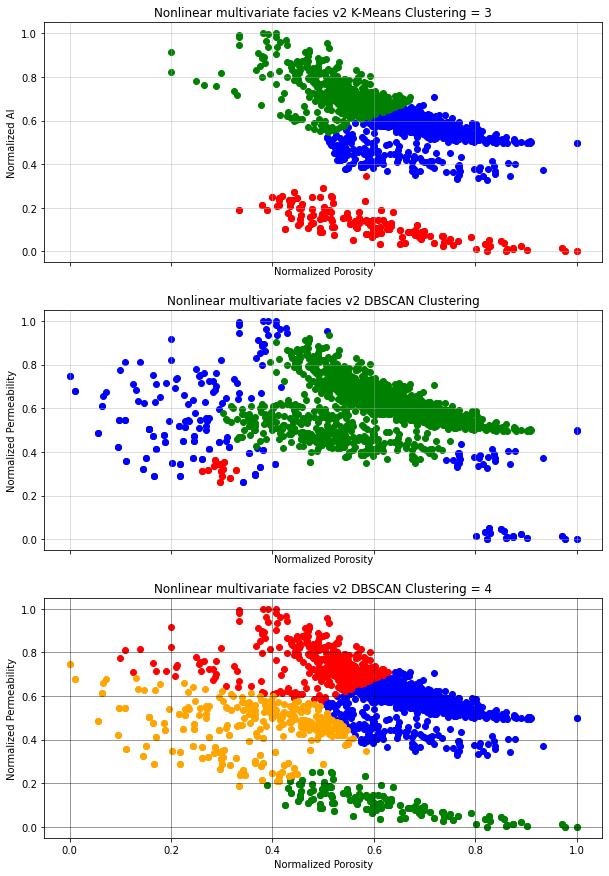

In [15]:
fig2, ax2 = plt.subplots(3, sharex = 'col', sharey = 'row', figsize = (10,15))

f7 = dfk2[dfk2['kmeans'] == 1]
f8 = dfk2[dfk2['kmeans'] == 2]
f9 = dfk2[dfk2['kmeans'] == 3]

db1 = dfd2[dfd2['DBSCAN'] == 0]
db2 = dfd2[dfd2['DBSCAN'] == 1]
db3 = dfd2[dfd2['DBSCAN'] == 2]
db3 = dfd2[dfd2['DBSCAN'] == 3]
db4 = dfd2[dfd2['DBSCAN'] == 4]
db5 = dfd2[dfd2['DBSCAN'] == 5]
db6 = dfd2[dfd2['DBSCAN'] == 6]

f10 = df2_ap[df2_ap['AP Cluster'] == 0]
f11 = df2_ap[df2_ap['AP Cluster'] == 1]
f12 = df2_ap[df2_ap['AP Cluster'] == 2]
f13 = df2_ap[df2_ap['AP Cluster'] == 3]
##Generating plot for K-Means Clustering
ax2[0].scatter(f7['nPor'], f7['nAI'], color = 'blue')
ax2[0].scatter(f8['nPor'], f8['nAI'], color = 'red')
ax2[0].scatter(f9['nPor'], f9['nAI'], color = 'green')
plt.grid(which = 'both', color = 'black')
ax2[0].grid(which = 'minor', alpha=0.1)
ax2[0].grid(which = 'major', alpha = 0.5)
ax2[0].set_xlabel('Normalized Porosity')
ax2[0].set_ylabel('Normalized AI')
ax2[0].set_title(f'Nonlinear multivariate facies v2 K-Means Clustering = {K2}')

##Generating plot for DBSCAN Clustering
ax2[1].scatter(db1['nPor'], db1['nAI'], color = 'blue')
ax2[1].scatter(db2['nPor'], db2['nAI'], color = 'red')
ax2[1].scatter(db3['nPor'], db3['nAI'], color = 'green')
ax2[1].scatter(db4['nPor'], db4['nAI'], color = 'orange')
ax2[1].scatter(db5['nPor'], db5['nAI'], color = 'purple')
ax2[1].scatter(db6['nPor'], db6['nAI'], color = 'black')
plt.grid(which = 'both', color = 'black')
ax2[1].grid(which = 'minor', alpha=0.1)
ax2[1].grid(which = 'major', alpha = 0.5)
ax2[1].set_xlabel('Normalized Porosity')
ax2[1].set_ylabel('Normalized Permeability')
ax2[1].set_title('Nonlinear multivariate facies v2 DBSCAN Clustering')

#Generating plot for AP 
ax2[2].scatter(f10['nPor'], f10['nAI'], color = 'blue')
ax2[2].scatter(f11['nPor'], f11['nAI'], color = 'red')
ax2[2].scatter(f12['nPor'], f12['nAI'], color = 'green')
ax2[2].scatter(f13['nPor'], f13['nAI'], color = 'orange')
plt.grid(which = 'both', color = 'black')
ax2[2].grid(which = 'minor', alpha=0.1)
ax2[2].grid(which = 'major', alpha = 0.5)
ax2[2].set_xlabel('Normalized Porosity')
ax2[2].set_ylabel('Normalized Permeability')
ax2[2].set_title(f'Nonlinear multivariate facies v2 DBSCAN Clustering = {n_clusters_2}')

### Results and Discussion:

It is clear from the graphs above that Affinity Propagation can be used as an initial clustering technique to get a rough idea about the number of clusters involved in the data set. The parameters used in Affinity Propagation are not as straight forward compared to K-means and DBSCAN, but it will ultimately result in close values for the required clusters. 

One clear disadvantage to Affinity Propagation is time, the data sets used in this exercise are relatively small. One could imagine larger data sets would require significantly larger times to perform the clustering using Affinity Propagation. 

However, DBSCAN seems to have the largest deviation from the visualized data originally plotted. the main disadvantage of DBSCAN is it's sensitivity to it's parameters which are radius and number of samples in the region, which makes it result in a significant number of samples casted as outliers. It is my recommendation to start with K-means clustering coupled with the elbow method to determing the optimal number of clusters in the data set. While comparing the results to Affinity propagation for cross referencing if the data set was not significantly large. 

I hope this was helpful,

Odai Alaa Elyas

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
